In [1]:
import os
import numpy as np
os.chdir('/Users/perinik/github.com/NikhilPeri/steel-defect-detection')

import pandas as pd
from matplotlib import pyplot as plt
from utils.data import clean_training_samples, load_sample, display_sample

new_missing_masks = pd.read_csv('data/missing_masks/test_defects.csv')
new_missing_masks['ImageId_ClassId']=new_missing_masks['image_id']
new_missing_masks['new_proba']=new_missing_masks['class_proba']

old_missing_masks = pd.read_csv('data/missing_masks/test.csv')
old_missing_masks['old_proba'] = old_missing_masks['ClassProba']
%matplotlib inline

Using TensorFlow backend.


In [2]:
comp= pd.merge(
    old_missing_masks[['ImageId_ClassId', 'old_proba', 'EncodedPixels', 'Class']], 
    new_missing_masks[['ImageId_ClassId', 'new_proba']], on='ImageId_ClassId')

In [13]:
strong_positives = comp[
    (comp['EncodedPixels'] != '') &
    (comp['EncodedPixels'].notnull()) & (
        ((comp['Class'] == 1) & (comp['old_proba'] > 0.9) & (comp['new_proba'] > 0.9)) |
        ((comp['Class'] == 2) & (comp['old_proba'] > 0.9) & (comp['new_proba'] > 0.9)) |
        ((comp['Class'] == 3) & (comp['old_proba'] > 0.92) & (comp['new_proba'] > 0.92)) |
        ((comp['Class'] == 4) & (comp['old_proba'] > 0.9) & (comp['new_proba'] > 0.9)) 
    )
]
strong_positives[['ImageId_ClassId', 'EncodedPixels']].to_csv('data/raw/psuedo_samples.csv', index=False)

In [14]:
strong_positives = clean_training_samples(strong_positives[['ImageId_ClassId', 'EncodedPixels']], 'data/raw/test_images/')

In [15]:
strong_positives[['has_defect', 'class_1', 'class_2', 'class_3', 'class_4']].values.astype(np.uint8).sum(axis=0)

array([271,   7,   0, 246,  18], dtype=uint64)

has_defect     True
class_1        True
class_2       False
class_3       False
class_4       False
Name: 3, dtype: object


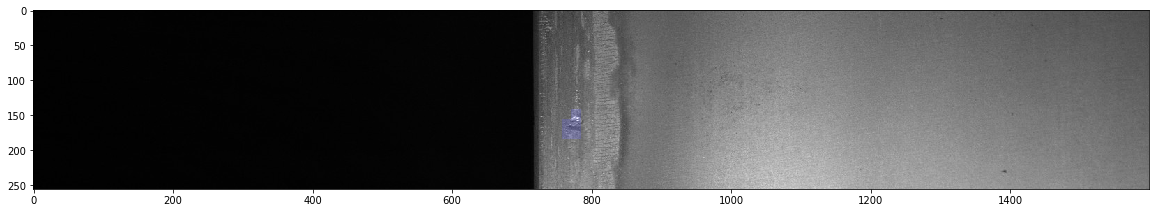

In [16]:
sample = strong_positives[strong_positives['class_1']].sample(1).iloc[0]
print(sample[['has_defect', 'class_1', 'class_2', 'class_3', 'class_4']])
plt.figure(figsize=(20,30))
display_sample(*load_sample(sample))

In [17]:
strong_positives

,id,image_id,class_1_encoded_pixels,class_2_encoded_pixels,class_3_encoded_pixels,class_4_encoded_pixels,has_defect,class_1,class_2,class_3,class_4,class
0,ecdcdfc6d.jpg,data/raw/test_images/ecdcdfc6d.jpg,201360 13 201616 13 201872 13 202128 13 202384...,,,,True,True,False,False,False,1
1,334b5fd37.jpg,data/raw/test_images/334b5fd37.jpg,201246 56 201501 57 201757 57 202013 57 202269...,,,,True,True,False,False,False,1
2,19c0e7a52.jpg,data/raw/test_images/19c0e7a52.jpg,194277 13 194532 14 194788 14 195044 14 195300...,,,,True,True,False,False,False,1
3,3cc137693.jpg,data/raw/test_images/3cc137693.jpg,194206 28 194461 29 194717 29 194973 29 195229...,,,,True,True,False,False,False,1
4,3d060ac2d.jpg,data/raw/test_images/3d060ac2d.jpg,32357 156 32613 156 32869 156 33125 156 33381 ...,,,,True,True,False,False,False,1
5,7521c2550.jpg,data/raw/test_images/7521c2550.jpg,197747 42 198003 42 198259 42 198515 42 198771...,,,,True,True,False,False,False,1
6,97880f512.jpg,data/raw/test_images/97880f512.jpg,190679 13 190935 13 191191 13 191447 13 191703...,,,,True,True,False,False,False,1
7,d670249ed.jpg,data/raw/test_images/d670249ed.jpg,,,43122 171 43365 184 43621 184 43877 184 44133 ...,,True,False,False,True,False,3
8,61ffc10bd.jpg,data/raw/test_images/61ffc10bd.jpg,,,380944 28 381200 28 381456 28 381712 28 381968...,,True,False,False,True,False,3
9,b98946867.jpg,data/raw/test_images/b98946867.jpg,,,258561 228 258817 6912 265743 242 266028 213 2...,,True,False,False,True,False,3
